In [ ]:
import sys
import os

sys.path.append(os.path.abspath('../../'))

In [2]:
import networkx as nx

from Classes.BiasedInfluenceGraph import *
from Classes.WordGenerator import *

## DeGroot Function

DeGroot function
$degroot(x) = x$

In [3]:
def degroot(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return x

It's possible to garantee consensus when influence $\ne$ 1 and the network is strongly connected

True


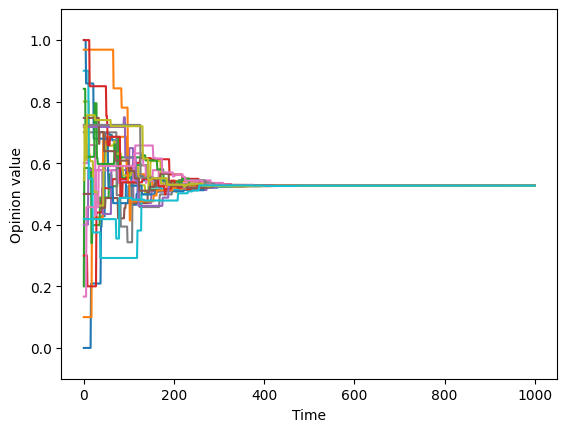

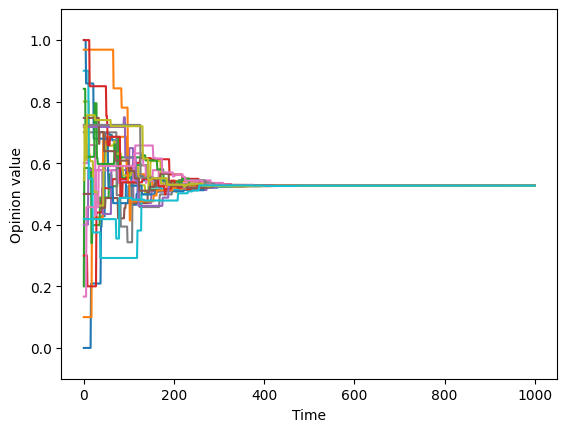

In [4]:
# Fig 1c. Random Erdos-Renyi graph
n = 20
p = 0.4
B0 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=lambda g, e: 0.5,bias_fn=degroot)

word_len = 50*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()

It's not possible to reach consensus when puppets ($I_{ij} = 1$) exists in the network 

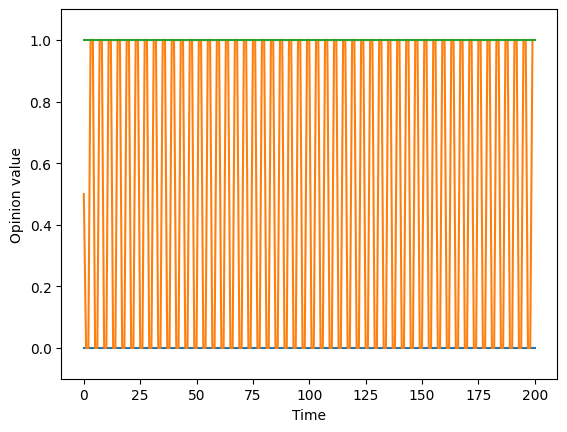

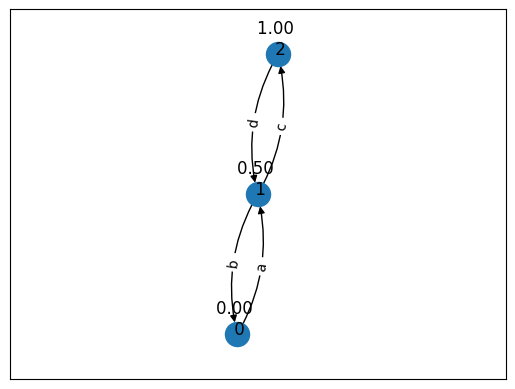

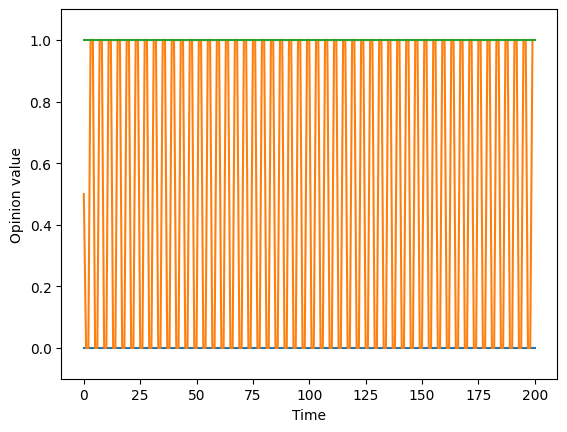

In [5]:
g = nx.DiGraph([(0,1),(1,0),(2,1),(1,2)])

puppet_influence = lambda g,e: 1

G = BiasedInfluenceGraph(4, ops=[0,0.5,1], G=g, influence_fn=puppet_influence, bias_fn=degroot)
nodes = 3

G.draw()

w = "abdc"*50
G.execute_word(w)

G.plot_opinion_evolution()

## Fantanic function

Fanaticism function
$fan(x) = \frac{x}{|x|}$

In [41]:
def fan(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return 0 if x == 0 else x/abs(x)

Influence: 0.5

True


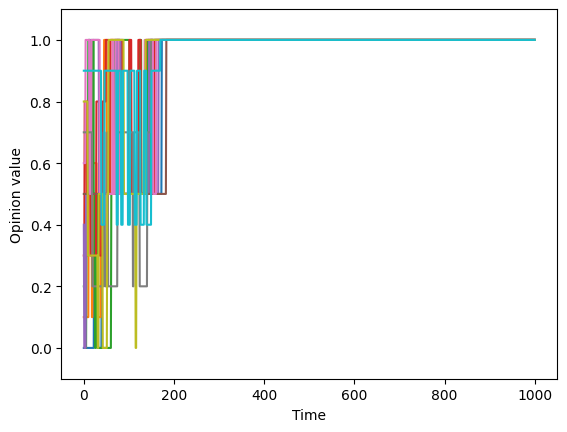

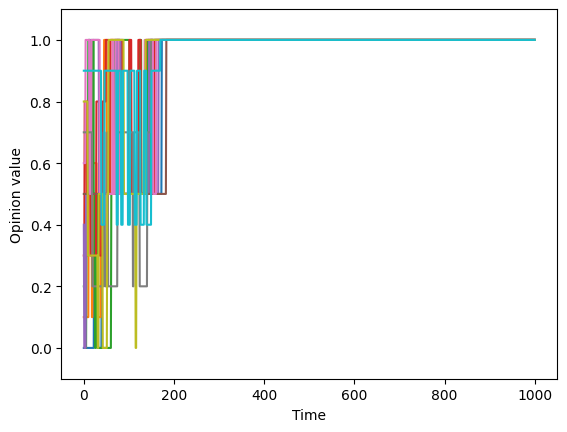

In [55]:
n = 10
p = 0.4
B0 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=lambda g, e: 0.5,bias_fn=fan)

word_len = 100*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()

Influence: 0.1

False


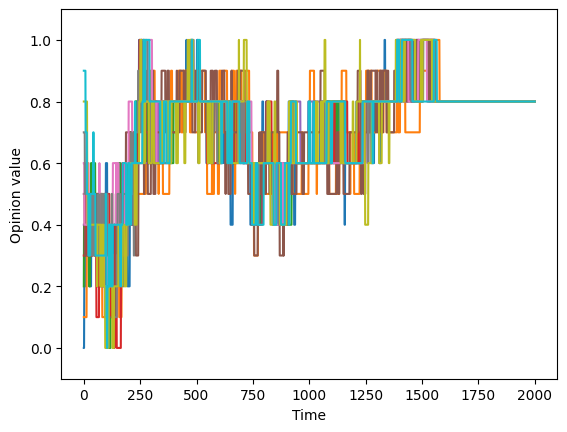

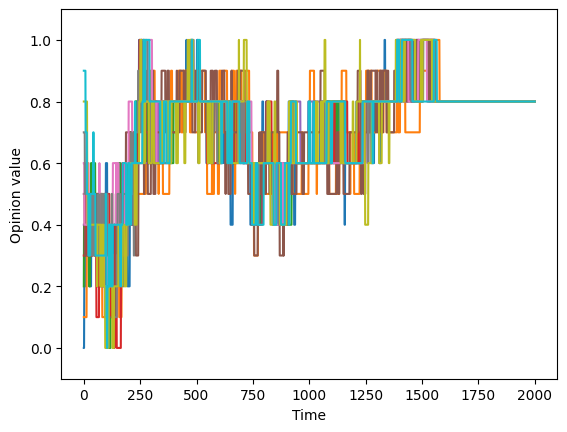

In [177]:
n = 10
p = 0.4
B0 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=lambda g, e: 0.2,bias_fn=fan)

word_len = 200*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()

It's not possible to guarantee consensus

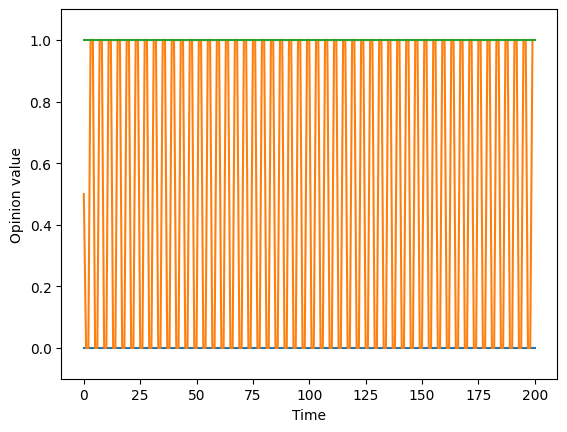

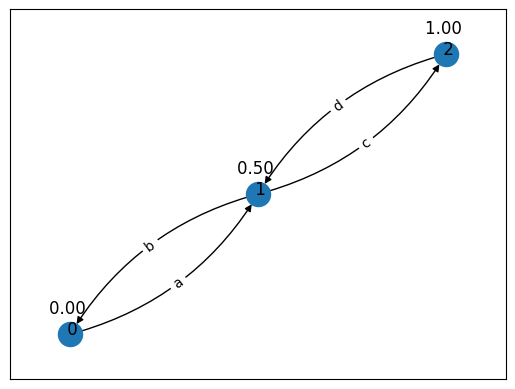

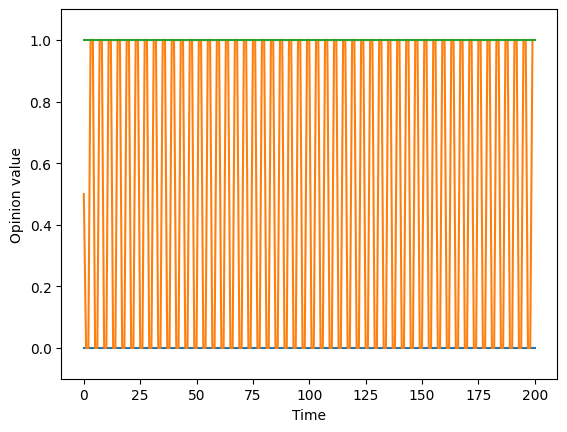

In [135]:
g = nx.DiGraph([(0,1),(1,0),(2,1),(1,2)])

puppet_influence = lambda g,e: 1

G = BiasedInfluenceGraph(4, ops=[0,0.5,1], G=g, influence_fn=puppet_influence, bias_fn=fan)
nodes = 3

G.draw()

w = "abdc"*50
G.execute_word(w)

G.plot_opinion_evolution()

## Linear Function

bias function $\beta _{ji}(x) = mlin(x) = \delta x$ where $\delta \ge 1$.

If $\delta = 1$, then $mlin(x) = degroot(x)$

In [94]:
def mlin(G,e):
    alpha = 2
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return alpha * x

True


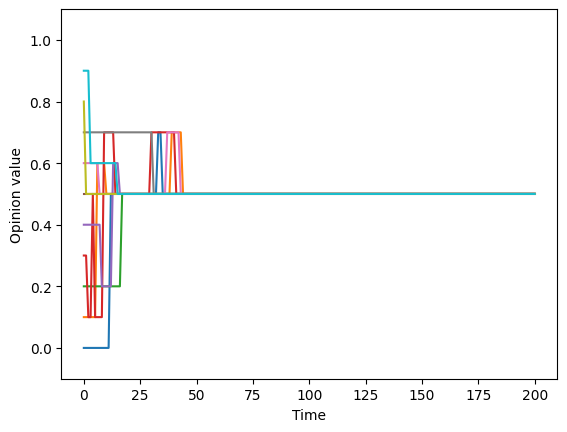

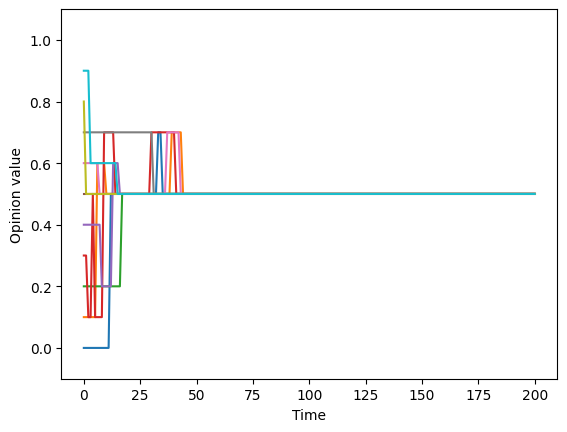

In [95]:
n = 10
p = 0.4
B0 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=lambda g, e: 0.5,bias_fn=mlin)

word_len = 20*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()

Same as previous function, it's not possible to guarantee consensus

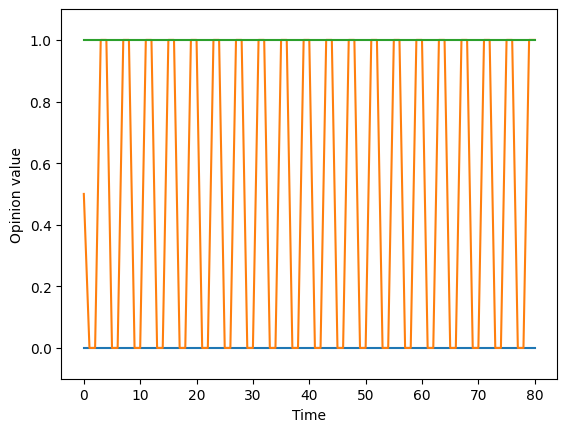

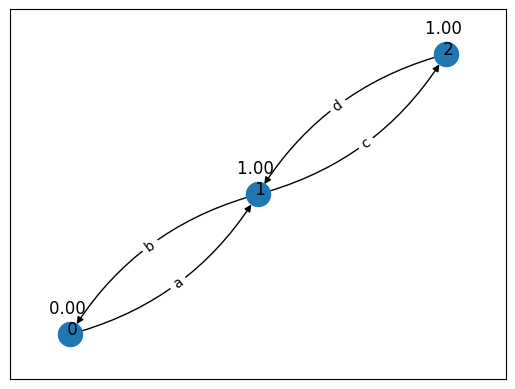

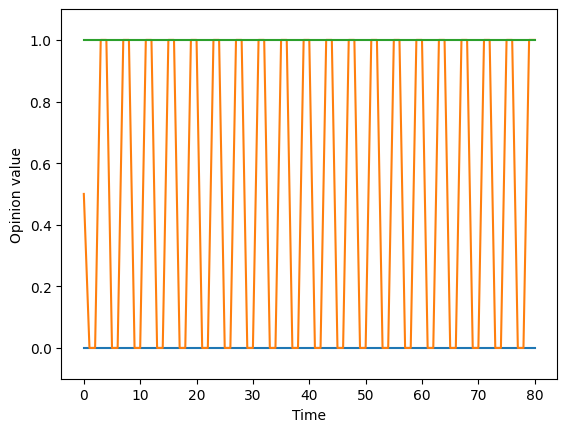

In [245]:
g = nx.DiGraph([(0,1),(1,0),(2,1),(1,2)])

puppet_influence = lambda g,e: 1

G = BiasedInfluenceGraph(4, ops=[0,0.5,1], G=g, influence_fn=puppet_influence, bias_fn=mlin)
nodes = 3

w = "abdc"*20
G.execute_word(w)

G.draw()
G.plot_opinion_evolution()


An interesting case

In [270]:
def mlin(G,e):
    alpha = 1.3
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return alpha * x

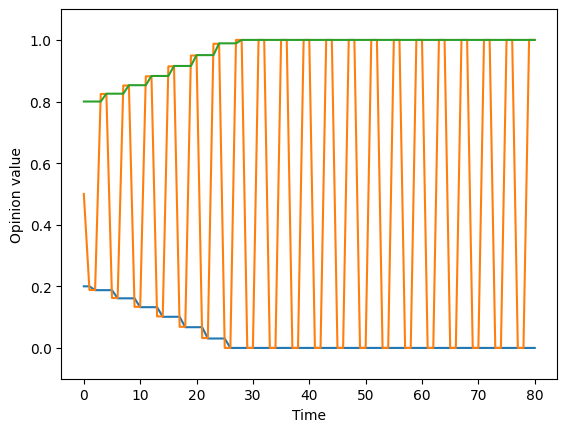

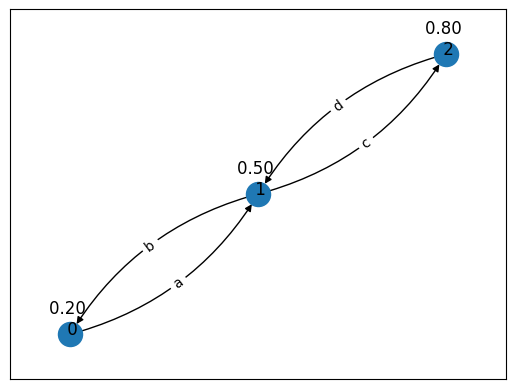

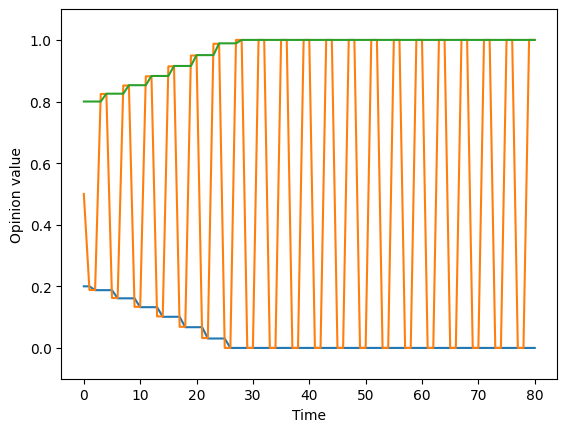

In [293]:
g = nx.DiGraph([(0,1),(1,0),(2,1),(1,2)])

puppet_influence = lambda g,e: 0.8

G = BiasedInfluenceGraph(3, ops=[0.2,0.5,0.8], G=g, influence_fn=puppet_influence, bias_fn=mlin)
nodes = 3

G.draw()

w = "abdc"*20
G.execute_word(w)
G.plot_opinion_evolution()


This happens when $I_{ij} \cdot \delta > 1$

##  Document example

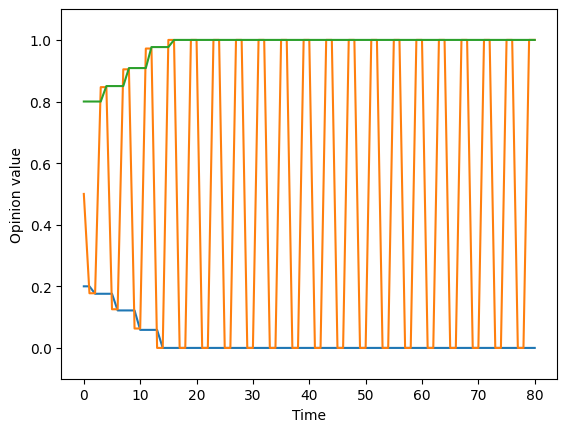

In [ ]:
g = nx.DiGraph([(0,1),(1,0),(2,1),(1,2)])

puppet_influence = lambda g,e: 0.5

def f(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return 2.15 * x

G = BiasedInfluenceGraph(3, ops=[0.2,0.5,0.8], G=g, influence_fn=puppet_influence, bias_fn=f)
nodes = 3

w = "abdc"*20
G.execute_word(w)
G.plot_opinion_evolution()


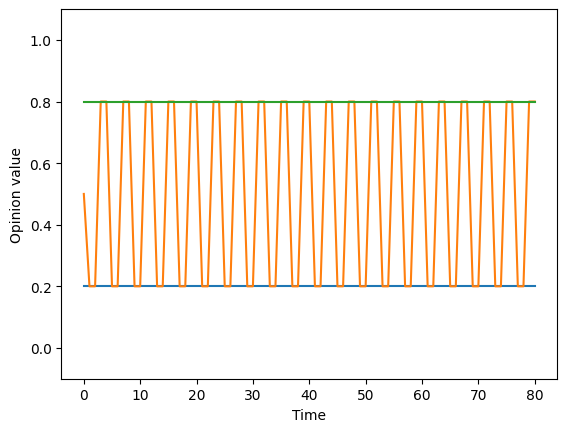

In [16]:
g = nx.DiGraph([(0,1),(1,0),(2,1),(1,2)])

puppet_influence = lambda g,e: 0.5

def f(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return 2 * x

G = BiasedInfluenceGraph(3, ops=[0.2,0.5,0.8], G=g, influence_fn=puppet_influence, bias_fn=f)
nodes = 3

w = "abdc"*20
G.execute_word(w)
G.plot_opinion_evolution().savefig("../images/M_region/OE_stability.png")


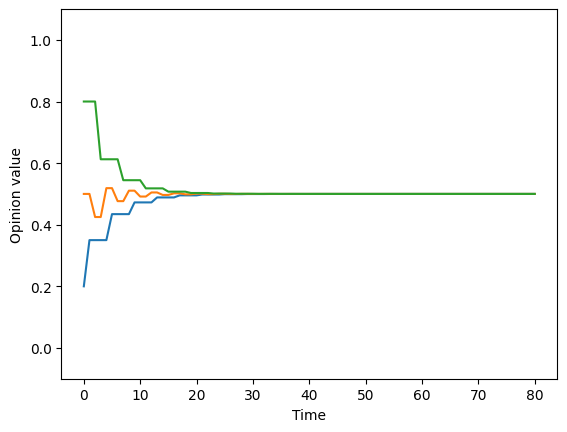

In [ ]:
g = nx.DiGraph([(0,1),(1,0),(2,1),(1,2)])

puppet_influence = lambda g,e: 0.5

def f(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return x

G = BiasedInfluenceGraph(3, ops=[0.2,0.5,0.8], G=g, influence_fn=puppet_influence, bias_fn=f)
nodes = 3

w = "adcb"*20
G.execute_word(w)
G.plot_opinion_evolution().savefig("../images/M_region/OE_consensus.png")


## Consensus Simulations for $mlin$ function

Test where opinion get closer without moving further

In [26]:
def mlin(G,e):
    delta = 2
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return delta * x

True


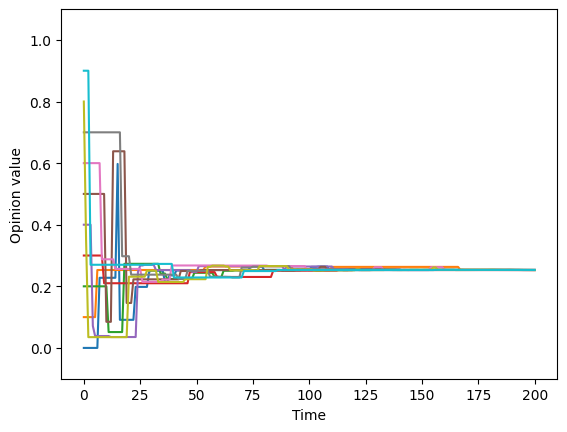

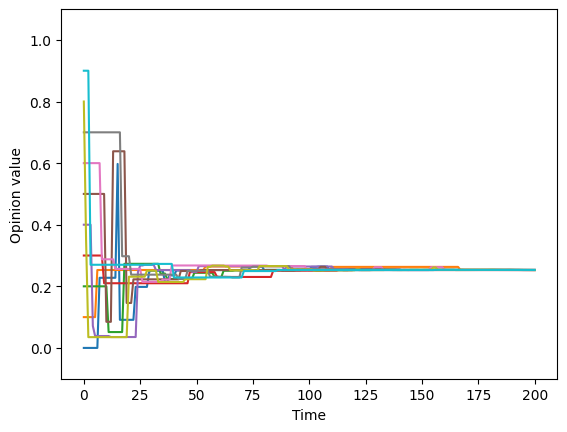

In [27]:
n = 10
p = 0.4
B0 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=lambda g, e: 0.45,bias_fn=mlin)

word_len = 20*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()

In [29]:
import random

# Lista de valores de delta por pareja
delta_values = {}

# lista de valores de influencia por pareja
influence_values = {}

def get_random_delta_for_pair(e):
    if e not in delta_values:
        delta_values[e] = random.randrange(1,10)
    return delta_values[e]

def get_random_influence_for_pair(e):
    if e not in influence_values:
        influence_values[e] = random.uniform(0, 1 / delta_values[e])
    return influence_values[e]

def mlin(G, e):
    delta = get_random_delta_for_pair(e)
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return delta * x

def random_inf(G, e):
    return get_random_influence_for_pair(e)

False


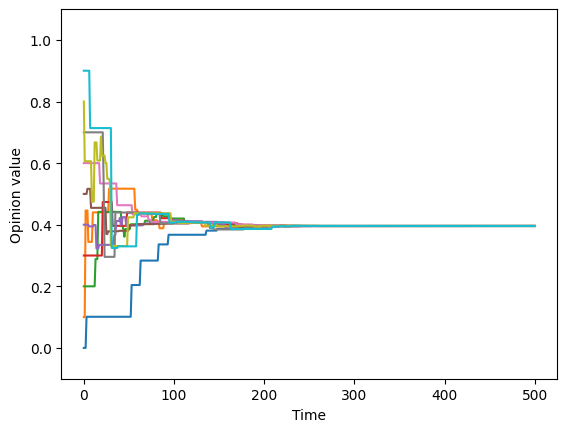

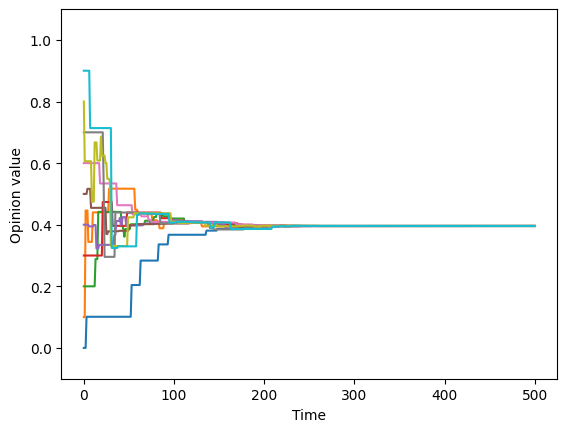

In [ ]:
n = 10
p = 0.4
B0 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=random_inf,bias_fn=mlin)

word_len = 50*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()

Test where the opinion moves further when two agents interacts

In [ ]:
import random

# list of delta values by pair
delta_values = {}

# list of influence values by pair
influence_values = {}

def get_random_delta_for_pair(e):
    if e not in delta_values:
        delta_values[e] = random.randrange(1,5)
    return delta_values[e]

def get_random_influence_for_pair(e):
    if e not in influence_values:
        # Generate a random value such that random_value * delta_values[e] > 1
        delta = delta_values[e]
        min_value = 1 / delta + 0.01  # add small epsilon to ensure > 1
        influence_values[e] = random.uniform(min_value, 1)
    return influence_values[e]

def mlin(G, e):
    delta = get_random_delta_for_pair(e)
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return delta * x

def random_inf(G, e):
    return get_random_influence_for_pair(e)

True


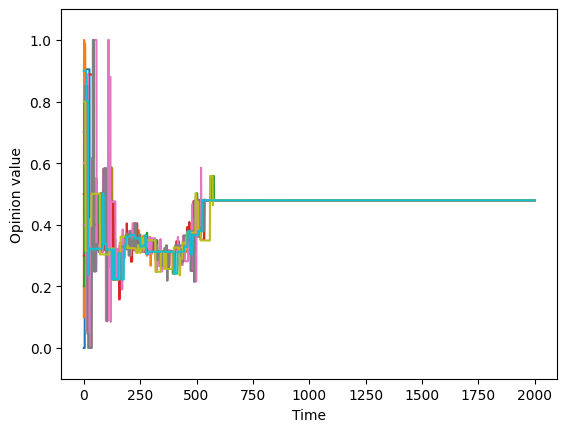

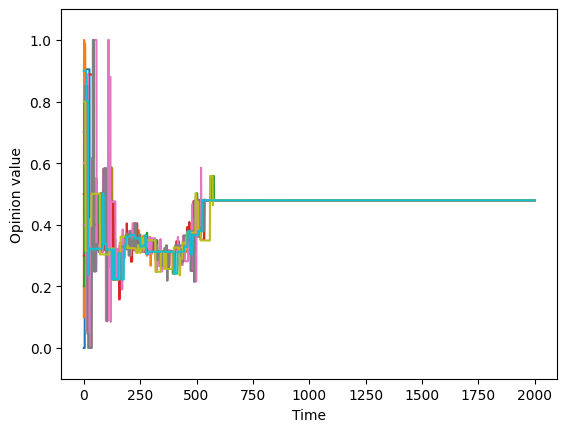

In [187]:
n = 10
p = 0.4
B0 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

G = BiasedInfluenceGraph(n,G=nx.fast_gnp_random_graph(n, p, directed=True), ops=B0, influence_fn=random_inf,bias_fn=mlin)

word_len = 200*n
w = generate_random_word(G, word_len)
G.execute_word(w)

print(nx.is_strongly_connected(G))

G.plot_opinion_evolution()

## Changing run exections

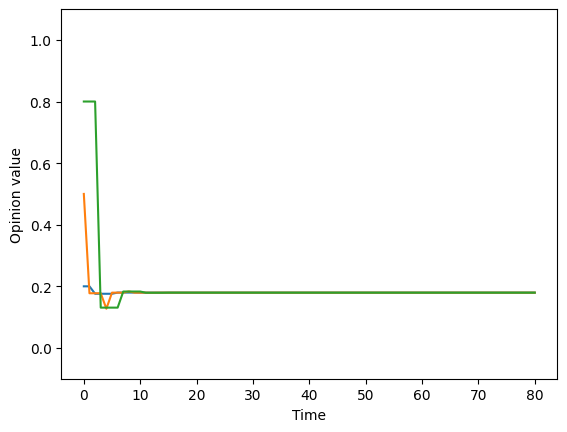

In [ ]:
g = nx.DiGraph([(0,1),(1,0),(2,1),(1,2)])

puppet_influence = lambda g,e: 0.5

def f(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return 2.15 * x

G = BiasedInfluenceGraph(3, ops=[0.2,0.5,0.8], G=g, influence_fn=puppet_influence, bias_fn=f)
nodes = 3

w = "abcd"*20
G.execute_word(w)
G.plot_opinion_evolution()

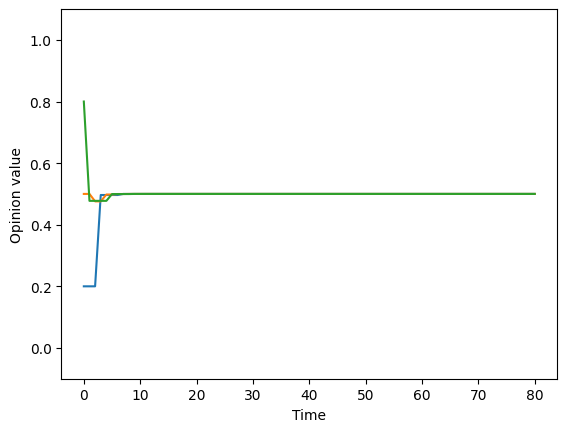

In [ ]:
g = nx.DiGraph([(0,1),(1,0),(2,1),(1,2)])

puppet_influence = lambda g,e: 0.5

def f(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return 2.15 * x

G = BiasedInfluenceGraph(3, ops=[0.2,0.5,0.8], G=g, influence_fn=puppet_influence, bias_fn=f)
nodes = 3

w = "cdba"*20
G.execute_word(w)
G.plot_opinion_evolution()

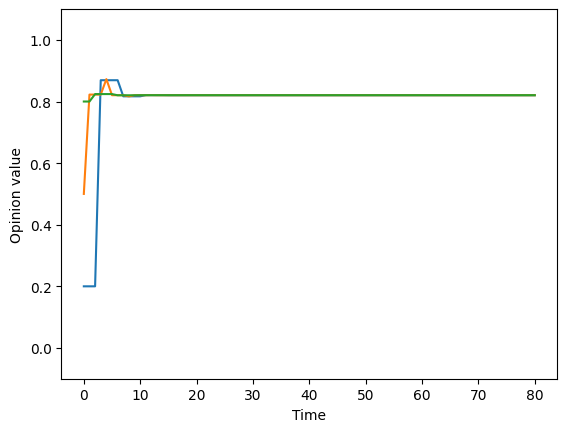

In [201]:
g = nx.DiGraph([(0,1),(1,0),(2,1),(1,2)])

puppet_influence = lambda g,e: 0.5

def f(G,e):
    x = G.opinion[e[0]] - G.opinion[e[1]]
    return 2.15 * x

G = BiasedInfluenceGraph(3, ops=[0.2,0.5,0.8], G=g, influence_fn=puppet_influence, bias_fn=f)
nodes = 3

w = "dcba"*20
G.execute_word(w)
G.plot_opinion_evolution().savefig("../images/M_region/OE_run_consensus_3.png")